# Final Project - Forecasting Intermittent Demand with Recurring Neural Networks (RNN)

## Description

The objective of this project is to assess the ability of an RNN to forecast sales based on historical data.  There  are many studies on how RNNs are well suited for forecasting sales.  However, this project will focus on demand profiles of products that exhibit sporatic demand patterns.  A brief discussion of sporatic demand is provided below. 

At a high level, product families to be forecast will be based on high revenue generating families and demand patterns.  The data set will consist of 45 months (Jan 2020 - Oct 2023) of demand history for the selected product lines.  The first three years will be used for training and testing and the last year used for model evaluation.  Given the propritary nature of the data some specifics of the data will be ommitted.

***Motivation / Problem OVerview***

The ability to accurately forecast future demand is critical to any business.  Forecasting future demand in mixed model businesses requires different forecasting models depending on the business model’s historical demand profiles. Using a single model across all business units or product lines can lead to excellent results in some areas and very poor results in others.  The ability to classify the various demand profiles allows for application of the most appropriate forecasting model and improved forecasting accuracy.

Additionally, demand inevitably changes over time, therefore identifying and understanding how demand is changing is critical to accurate forecasting.  The ability to identify profile changes and reclassify the demand patterns allows for a pivot to a more appropriate forecasting model based on current demand attributes.
Forecasts have impacts across the business.  Inventory levels, long and short-term capacity, strategic plans, headcount, and profit are all intimately linked to understanding future demand.

When future demand is overstated the business will be left with slow moving or obsolete inventory, excess capacity and human resources leading to negative impacts on profits and other financial performance metrics.
When future demand is understated the business will not be prepared from a materials, capacity or resource position to meet the actual demand.  The end result being additional costs in expediting material and unplanned overtime costs.  Again, eroding profits and negatively impacting financial performance.  Additionally, not meeting customer demand often leads to lost business as customers find alternate suppliers.

In the end, accurate forecasting is crucial. And critical to accurate forecasting is correct demand pattern classification so that the optimal forecasting model is deployed.


**Recurring Neural Networks**

Model Architecture - Long-Short Term Memory (LSTM)

The LSTM model is built around the recurring neural networks (RNN) architecture. RNNs are neural networks that are capable of analyzing sequential or time series data. The LSTM is based on a network of gates and feedback loops between nodes and layers. These gates and feedback loops result in the ability of the network to maintain information over time, where the time frames vary.

The ability to maintain both short- and long-term information allows the network to contextualize the information. The contextualization characteristic brings the network closer to analyzing information as a human would. This makes LSTM models especially adept at analyzing sequential data such a speech or text recognition.

We will use the LSTM model to analyze and categorize texts in this project. The goal of the LSTM is to properly characterize texts as disaster related or not. The LSTM model will use training and learned context within the texts to characterize each text.

The basic LSTM first initializes the text sequence through an encoder. The encoder transforms the character text strings in to linear arrays based on encoder parameters. The encoded sequences then pass through various LSTM layers and dense layers to generate a characterization of the text.

This project will compare two LTSM model architectures, based on accuracy, to see which architecture provides the better performance. The first model will be a basic LSTM model with and embedding(encoding) layer, a bi-directional LSTM layer, followed by a dense layer with ReLU activation. Then pass to a dense layer of one that feeds the characterization layer with sigmoid activation for characterization purposes.

The second model will bracket the LSTM layer with a spatial dropout and dropout layer. The purpose of the addition of the dropout layers is to assess the impact on potential overfitting in the base model.


## EDA / Data Summary

**Sporatic Demand**

Since the demand pattern detailed analysis is beyond the primary scope of the project aand was only used aas a selection tool for the forecasting data an abbreviated explanationof the the EDA and demand pattern analysis is provided.

Traditional forecasting models and evaluation metrics break down when past demand is not “smooth”.  Sporatic demand is when past demand is intermittent (many periods or consecutive periods with zero demand) or erratic (demand levels with large variability) traditional models break down.  They tend to bias towards the zero periods or demand level extremes.

In 1972, J. Croston developed a more suitable forecasting model to accommodate intermittent demand.  As part of the model development, Croston defined a new classification scheme for demand patterns.

The classification model is comprised of two attributes.  First is the Average Demand Interval (ADI), which is the average of demand over total periods with demand.  For example, given the 12-period sample demand profile in Table 1, ADI = 2.0 (12 Total Periods / 6 Periods with Demand).  This attribute provides the average demand interval in periods, when there is actual demand.

The second attribute, the Coefficient of Variance Squared (CV2) captures the variability in the level of demand.  This is the standard deviation (σ) of the demand divided by the mean (m) of the demand squared.  Again, the population is for the periods with actual demand.

Cronston identified four distinct demand patterns based on the ADI-CV2 pair.  The patterns are Erratic, Intermittent, Lumpy and Smooth.  See Image 1,provided by FREPPLE, for a grphical representation.  The four patterns are characterized as follows:

•	Erratic – Regular Demand in Time with High Variability Demand Quantities

•	Intermittent - Irregular Demand in Time with Low Variability Demand Quantities

•	Lumpy - Irregular Demand in Time with High Variability Demand Quantities

•	Smooth - Regular Demand in Time and Demand Quantities

***Image 1***

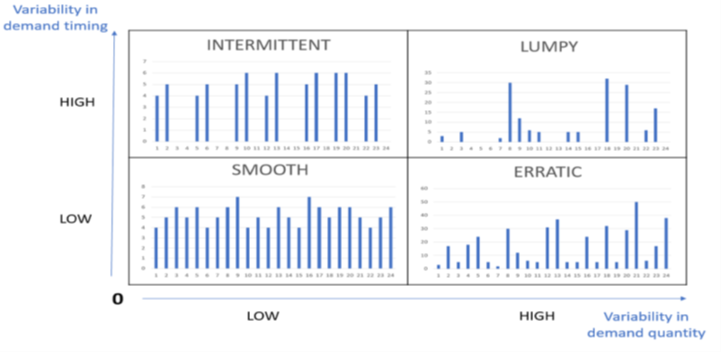


Reprinted from “Demand Classification: Why Forecastability Matters,” by FREPPLE). 2021 (https://frepple.com/blog/demand-classification/). Copyright 2021 by FREPPLE.


For simplicity and expediancy sake, the EDA and processsing of the demand pattern data was performed in Excell.  The intial data set consisted of 588 products whose demand history from 2017 to 2021 was analyzed.  The definitions for ADI and CV2 were applied via a simple spreadsheet.  Image 2 is a snapshot of the spreadsheet used to generate the demand profile distribution showed in image 3.  

***Image 2***
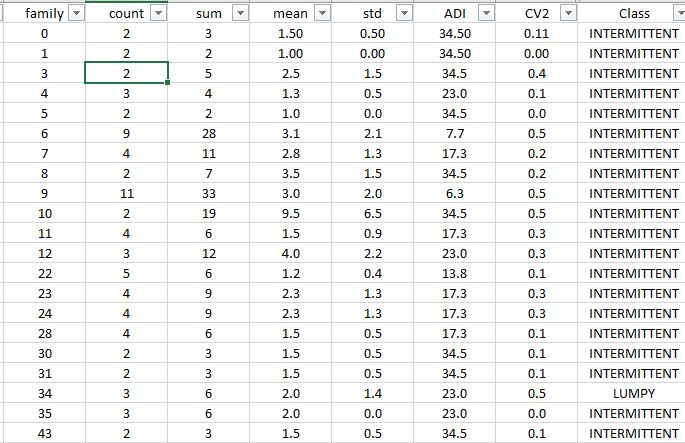

Image 3 defines the category mapping for theCronston demand pattern model.

***Image 3***
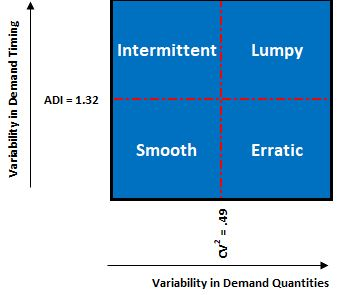

Image 4 shows the results of the demand pattern analysis.  Image 2 confirms that the demand patterns of the business unit (Business Unit 1) meets the criterial of of sporatic demand.  In summary, 86% of the products fell into the intermittent category and 102 into the lumpy catergory.

***Image 4***
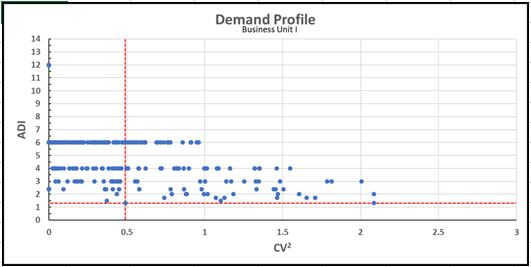

With the nature of the demand patterns identified and confirmed, selection of the specific product familes needs to be determined.  The determination of the specific products is based on the revenue generated for each of the product families.  It was determined that 49 families generated ~90% of the revenue.  The demand history of these 49 families will be used in the forecasting model.

In [1]:
#!pip


In [2]:
#Set Page Width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Load Required Resources

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import models
from tensorflow.python.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Embedding
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Bidirectional
from keras.optimizers import Adam
from tensorflow.keras.layers import*

In [8]:
## Import Data
demand_df = pd.read_csv("demand.csv")
demand_pattern_df = pd.read_csv("demand_patterns.csv ")

print(demand_df.head(), '\n')
print(demand_df.info(), '\n')
print('Train Shape: ', demand_df.shape, '\n')
print(demand_pattern_df.head(), '\n')
print(demand_pattern_df.info())
print('Test Shape: ', demand_pattern_df.shape, '\n')

   family_id fabricated  hardware  business_unit_id  period  demand
0          1          Y         1                 1       1     355
1          1          Y         1                 1       2     205
2          1          Y         1                 1       3    1303
3          1          Y         1                 1       4     202
4          1          Y         1                 1       5     303 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   family_id         2205 non-null   int64 
 1   fabricated        2205 non-null   object
 2   hardware          2205 non-null   int64 
 3   business_unit_id  2205 non-null   int64 
 4   period            2205 non-null   int64 
 5   demand            2205 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 103.5+ KB
None 

Train Shape:  (2205, 6) 

   family _ID  count    sum    

### Model EDA

EDA will be performed as follows:

    1. Extract data and preprocess in Excell
    2. Remove Unnecessary Columns
    3. Verify Family and Period Count
    4. Family Pattern Distribution
    5. Pattern Time Series Examples
    

***Extract and Preprocess***

The data was extracted directly from the Enterprise Resource System (ERP).  Due to the extraction method and format of the data Excell is the prefered tool for data cleanse and structuring given its eas of use.  The general steps for data cleanse and structuring are as follows.

    1. Remove Unused Business Unit Lines (3 BUs)
    2. Remove Service Lines (non-demand lines)
    3. Remove Unnecessary Columns (18)
    4. Remove Unused Product Family Lines (202 Families)
    5. Remove Non-Fabricated Product Lines
    6. Assign Product Family Ids
    7. Pivot to Monthly View to Add 0 Quantity Months. (populate time series with 0 quantity months)
    8. Convert to Tidy format

**Drop fabricated, hardware and business_unit_id**

**Drop count, sum, mean, std**

In [9]:
# Drop fabricated, hardware  and business_unit_id 

demand_df = demand_df.drop(['fabricated', 'hardware', 'business_unit_id'], axis=1)
demand_pattern_df = demand_pattern_df.drop(['count', 'sum', 'mean', 'std'], axis=1)

print(demand_df.head(), '\n')
print(demand_pattern_df.head())

   family_id  period  demand
0          1       1     355
1          1       2     205
2          1       3    1303
3          1       4     202
4          1       5     303 

   family _ID   ADI   CV2    Class
0           1  1.57  0.95    LUMPY
1           2  1.00  0.81  ERRATIC
2           3  1.53  1.17    LUMPY
3           4  1.05  1.59  ERRATIC
4           5  3.63  1.39    LUMPY


**NA Check**

In [13]:
#Check for NaNs and Nulls
print('Demand NaNs / Null Count: ', demand_df.isna().sum(), '\n')
print('Demand Patterns NaNs / Null Count: ', demand_pattern_df.isna().sum(), '\n')

Demand NaNs / Null Count:  family_id    0
period       0
demand       0
dtype: int64 

Demand Patterns NaNs / Null Count:  family _ID    0
ADI           0
CV2           0
Class         0
dtype: int64 



NA Check For data frames as expected.

**Verify Family and Period Count**

In [21]:
print('Demand Unique Family ID Count: ', demand_df['family_id'].nunique(), '\n')
print('Demand Unique Period Count: ', demand_df['period'].nunique(), '\n')
print('Demand Pattern Unique Family ID Count: ', demand_pattern_df['family _ID'].nunique(), '\n')
print('Demand Pattern Unique Class Count: ', demand_pattern_df['Class'].nunique(), '\n')

Demand Unique Family ID Count:  49 

Demand Unique Period Count:  45 

Demand Pattern Unique Family ID Count:  49 

Demand Pattern Unique Class Count:  3 



Unique Value Check For data frames as expected.

***Family Pattern Distribution***

As can be seen in Chart 1, all of the families are classified with an intermittent pattern.  None of the familes being evaluted fall into the smooth pattern class.

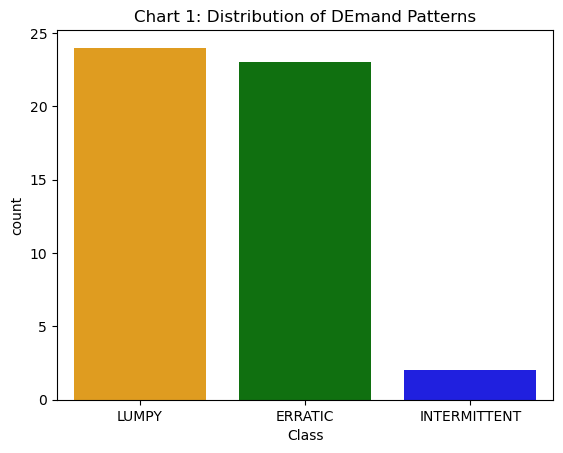

In [28]:
plt.figure()
sns.countplot(data=demand_pattern_df, x='Class', palette=['orange',"#008000", 'blue'])
plt.title('Chart 1: Distribution of DEmand Patterns')
plt.show()

**Sample Time Series PLots for Each Demand Pattern**

**Remove Punctuation**

**Remove Stop Words**

**Convert to all lower case**

### Models

Model Architecture - Long-Short Term Memory (LSTM)

The LSTM model is built around the recurring neural networks (RNN) architecture.  RNNs are neural networks that are capable of analyzing sequential or time series data.  The LSTM is based on a network of gates and feedback loops between nodes and layers.  These gates and feedback loops result in the ability of the network to maintain information over time, where the time frames vary.

The ability to maintain both short- and long-term information allows the network to contextualize the information.  The contextualization characteristic brings the network closer to analyzing information as a human would. 
This makes LSTM models especially adept at analyzing sequential data such a speech or text recognition.

We will use the LSTM model to analyze and categorize texts in this project.  The goal of the LSTM is to properly characterize texts as disaster related or not.  The LSTM model will use training and learned context within the texts to characterize each text. 

The basic LSTM first initializes the text sequence through an encoder.  The encoder transforms the character text strings in to linear arrays based on encoder parameters.  The encoded sequences then pass through various LSTM layers and dense layers to generate a characterization of the text. 

This project will compare two LTSM model architectures, based on accuracy, to see which architecture provides the better performance.  The first model will be a basic LSTM model with and embedding(encoding) layer, a bi-directional LSTM layer, followed by a dense layer with ReLU activation.  Then pass to a dense layer of one that feeds the characterization layer with sigmoid activation for characterization purposes.
 
The second model will bracket the LSTM layer with a spatial dropout and dropout layer.  The purpose of the addition of the dropout layers is to assess the impact on potential overfitting in the base model.

Transfer learning will not be deployed as to get a better feel for how well the base models learn and characterize from raw inputs.

Various epoch counts were reviewed with 15 being the sweet spot for observing the model differences, while maintaining a reasonable run time.


#### Simple LSTM Model

In [ ]:
#Split the training data
x_training_set, x_validation_set, target_train, target_validation= train_test_split(train_df['text'].values, train_df['target'].values, random_state=25, test_size=0.3, shuffle=True)


max_length_text = train_df.text.map(len).max()
print('Maximum Text Length: ', max_length_text)
dict_size = 15000
embedding_size = 64
#Set Up tokenizer

tokenizer = text.Tokenizer(num_words = dict_size)
tokenizer.fit_on_texts(x_training_set)

word_index = tokenizer.word_index

sequence_x_training_set = tokenizer.texts_to_sequences(x_training_set)
sequence_x_validation_set = tokenizer.texts_to_sequences(x_validation_set)
sequence_x_test_set = tokenizer.texts_to_sequences(test_df['text'].values)

sequence_x_training_set_padded = sequence.pad_sequences(sequence_x_training_set, maxlen=max_length_text)
sequence_x_validation_set_padded = sequence.pad_sequences(sequence_x_validation_set, maxlen=max_length_text)
sequence_x_test_set_padded = sequence.pad_sequences(sequence_x_test_set, maxlen=max_length_text)

print('Training Shape: ', sequence_x_training_set_padded.shape)
print('Sample: ', sequence_x_training_set_padded[0])

#Hyperparameter Tuning variables
dropout_rate = .2
recurrent_dropout_rate = .2
num_epochs = 15

model = Sequential()

model.add(Embedding(dict_size, embedding_size, input_length=max_length_text))
model.add(Bidirectional(tf.keras.layers.LSTM(64, dropout = dropout_rate, recurrent_dropout=recurrent_dropout_rate)))
model.add(Dense(embedding_size, activation='relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

input_shape = sequence_x_training_set_padded.shape  
model.build(input_shape) 

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(sequence_x_training_set_padded, np.asarray(target_train), epochs=num_epochs, validation_data=(sequence_x_training_set_padded, np.asarray(target_train)), verbose=2)

#### Complex LSTM Model
Increase the complexity of the previous model by adding a Spatial Dropout layer and a Dropout layer around the LSTM layer.  The addtional layers are intended to help provide increased accurracy while attempting to protect agaist overfitting.

In [ ]:
model_complex = Sequential()

model_complex.add(Embedding(dict_size, embedding_size, input_length=max_length_text))
model_complex.add(SpatialDropout1D(0.5))  ## addtional layer
model_complex.add(Bidirectional(tf.keras.layers.LSTM(64, dropout = dropout_rate, recurrent_dropout=recurrent_dropout_rate)))
model_complex.add(Dropout(0.2)) ## addtional layer
model_complex.add(Dense(embedding_size, activation='relu'))
model_complex.add(Dense(1))
model_complex.add(Activation('sigmoid'))

input_shape = sequence_x_training_set_padded.shape  
model_complex.build(input_shape) 

model_complex.summary()

model_complex.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

comlex_history = model_complex.fit(sequence_x_training_set_padded, np.asarray(target_train), epochs=num_epochs, validation_data=(sequence_x_training_set_padded, np.asarray(target_train)), verbose=2)


### Model Comparison

In [ ]:
#Simple Model
model_accuracy = history.history['accuracy']
model_val_acc = history.history['val_accuracy']
model_loss = history.history['loss']
model_val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, model_accuracy, label='Training Accuracy')
plt.plot(epochs_range, model_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Plo1 1: Simple Model Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, model_loss, label='Training Loss')
plt.plot(epochs_range, model_val_loss, label='Validation Loss')
plt.legend(loc='upper center')
plt.title('Plot 2: Simple Model Loss')
plt.show()

#complex Model
model_complex_accuracy = comlex_history.history['accuracy']
model_complex_val_acc = comlex_history.history['val_accuracy']
model_complex_loss = comlex_history.history['loss']
model_complex_val_loss = comlex_history.history['val_loss']


plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, model_complex_accuracy, label='Training Accuracy')
plt.plot(epochs_range, model_complex_val_acc, label='Validation Accuracy')
plt.legend(loc='lower center')
plt.title('Plot 3: Complex Model Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, model_complex_loss, label='Training Loss')
plt.plot(epochs_range, model_complex_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Plot 4: Complex Model Loss')
plt.show()

**Table 1: Model Complexity vs Accuracy**

|Model|Accuracy|Validation Accuracy|
|:----|:--------:|:--------:|
|Simple|.9842|.9889|
|Complex|.9722|.9872|


Plots 1 thru 4 provide a view of the training accuracy and loss metrics between the simple and complex LSTM models.  Based on the charts and table, increasing the complexity by adding the additional dropout layers negatively impacted the accuracy.  The more complex model showed ~1.5% degradation.  

However, when looking closely at the plots at around the 8th epoch, the simple model’s accuracy and loss begin to show signs of slight cavitation.  Additionally, by the 15th epoch the loss and accuracy of the base model are essentially identical.  

Whereas the complex model’s accuracy and loss continue to converge with the gap between the two eventually leveling out around the 10th epoch.   

Taking these two observations together it appears that the simple model could be showing the initial signs of overfitting, while the complex model does not.  The implication being that adding the additional dropout layers aided in protecting the complex model from potential overfitting. 



### Hyperparameter Tuning

Number of Epochs will be varied and the impact on accruacy assessed.

In [ ]:
epoch_count = [5, 10, 15, 20]
history = []

for e in epoch_count:

    num_epochs = e
    
    tune_model = Sequential()

    tune_model.add(Embedding(dict_size, embedding_size, input_length=max_length_text))
    tune_model.add(Bidirectional(tf.keras.layers.LSTM(64, dropout = dropout_rate, recurrent_dropout=recurrent_dropout_rate)))
    tune_model.add(Dense(embedding_size, activation='relu'))
    tune_model.add(Dense(1))
    tune_model.add(Activation('sigmoid'))

    input_shape = sequence_x_training_set_padded.shape  
    tune_model.build(input_shape) 

    tune_model.summary()
    
    tune_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    tune_history = tune_model.fit(sequence_x_training_set_padded, np.asarray(target_train), epochs=num_epochs, validation_data=(sequence_x_training_set_padded, np.asarray(target_train)), verbose=2)

    print('Eochs: ', e)
    print('History: ', tune_history.history)
    history.append(tune_history.history)

### Hyperparameter Tuning Results

In [ ]:

e1 = [11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
x_e1 = range(0,5)
x_e2 = range(0,10)
x_e3 = range(0,15)
x_e4 = range(0,20)

fig, ax = plt.subplots()
ax.plot(x_e1, history[0]['accuracy'], label='5 Epochs', color='blue')
ax.plot(x_e2, history[1]['accuracy'], label='10 Epochs', color = 'red')
ax.plot(x_e3, history[2]['accuracy'], label='15 Epochs', color='black')
ax.plot(x_e4, history[3]['accuracy'], label='20 Epochs', color = 'orange')

legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot 5: Comparison of  Epoch Count')
plt.show()

#### Accuracy Comparison
**Table 2: Epoch Count vs Accuracy**

|Epoch Count|Accuracy|Validation Accuracy|
|:----|:--------:|:--------:|
|5|.9758|.9844|
|10|.9810|.9865|
|15|.9846|.9884|
|20|.9859|.9882|

As can be seen in Plot 5 and Table 2, increased epoch count provided a marginal impact to accuracy.  Increasing the epoch count from 5 to 20 realized a 1% increase in accuracy from 97.58% to 98.59% respectively.  Plot 5 also shows that the accuracy climb rate was not impacted by the number of epochs, all four cases climbed in accuracy at essentially the same rate.

Given the margin improvement in test and validation accuracy, going with the 10-15 epochs is the best tradeoff given computational resources and model accuracy.







In [ ]:
#Get test set predictions
target_test = model.predict(sequence_x_test_set_padded, verbose = 1)
target_test
print('Test Shape: ', target_test.shape, '\n')

In [ ]:
#Generate submission file
test_submission = np.where(target_test <= 0.5, 0, 1)

final_submission = np.transpose(test_submission)[0]
final_submission = pd.DataFrame()
final_submission['id'] = test_df['id']
final_submission['target'] = test_submission
print(final_submission.head())

final_submission.to_csv('submission.csv', index=False)

### Conclusion

**Model Comparison**

Over 15 epochs, comparisons of the simple and complex models showed marginal accuracy and loss differences.  The simple model performed slightly better with its final accuracy 1.2% better at 98.42%, then the complex model at 97.22%.

However, as outlined above, the simple model began to show the initial signs of potential overfitting at around the 10th epoch, while the complex model did not.  Based on the analysis and discussion above, the conclusion is that the addition of the drop out layers to the complex model proved to be beneficial.  Given the marginal difference in performance and the overfitting protection on the complex model, the complex model is deemed the better of the two.


**Hyperparamter Tuning**

Hyperparameter tuning, varying the number of epochs, provided some insight into how epoch count impacted the model’s performance.  The total difference in performance across the 4 different epoch counts resulted in a maximum accuracy difference of 1.01% between 5 and 20 epochs.  The middle two epoch counts (10 and15) resulted in only a .36% difference in accuracy.
When considering the essentially identical accuracy rate climb between models and the minimal accuracy differences, 10 epochs is deemed more than sufficient in getting good accuracy, while balancing computation effort.


**Test Submission**

Best model submission was 78.85%. Based on the much better performance of the training and validation models one can conclude that overfitting existed or that the test data was reasonably different from the training data set.  Most likely a combination of both.







### References

Croston, J. (1972). Forecasting and stock control for intermittent demands. , 23, 289-304. Opl Res Q, 289-304.
Brownlee, Jason (2016).  Deep Learning for Time SeriesTime Series Prediction with LSTM Recurrent Neural Networks in Python with Keras., https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/.
